In [1]:
import os
# from os.path import exists
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
import seaborn as sns

import numpy as np

In [13]:
print('Seaborn version > 0.13 is required. Your version is:')
print(sns.__version__)

Seaborn version > 0.13 is required. Your version is:
0.13.1


## Variables

In [3]:
### Set the directory path
base_dir = os.getcwd()
main_dir = os.path.join(base_dir, '..')
dir = os.path.join(main_dir, 'Data')
plots_outdir = os.path.join(main_dir, 'Data_Analysis', 'RatingPlots')

if not os.path.exists(f'{plots_outdir}-PREVis'):
    os.makedirs(f'{plots_outdir}-PREVis')

if not os.path.exists(f'{plots_outdir}-factors'):
    os.makedirs(f'{plots_outdir}-factors')


### Declare our variables

#list of conditions (used in questions' codes)
conditions = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F'
]

full_factors = {
    "Understand" : ['obvious', 'meanOveral', 'confid', 'represent', 'understandEasi', 'understandQuick', 'meanElem'],
    "Layout" : ['crowd', 'messi', 'distract', 'organiz'],
    "DataFeat" : ['visibl', 'see'],
    "DataRead" : ['find', 'identifi', 'valu', 'inform', 'readabl']
}

final_scale = {
    "Understand" : ['obvious', 'represent', 'understandEasi'],
    "Layout" : ['messi', 'crowd', 'distract'],
    "DataFeat" : ['visibl', 'see'],
    "DataRead" : ['inform','identifi','find']
}

#items names

items = [
'answer',
'clearData',
'clearRepresent',
'complex',
'confid',
'confus',
'crowd',
'deciph',
'distinguish',
'distract',
'effect',
'find',
'identifi',
'inform',
'lost',
'meanElem',
'meanOveral',
'messi',
'obvious',
'organiz',
'read',
'readabl',
'represent',
'see',
'simpl',
'understandEasi',
'understandQuick',
'valu',
'visibl',
]

# custom colors for each factor

# one color + one desaturated color
colors = {
    "Understand" : ['#4ba1bc','#829599'],
    "Layout" : ['#839e49', '#969b86'],
    "DataRead" : ['#a87c9f', '#a396a0'],
    "DataFeat" : ['#e08095', '#c6b6ba']
}


# Load answers

In [4]:
df = pd.read_csv(f'{dir}/ratings-stimulus.csv')
df

,seed,stimulus,answer,clearData,clearRepresent,complex,confid,confus,crowd,deciph,...,organiz,read,readabl,represent,see,simpl,understandEasi,understandQuick,valu,visibl
0,137777602085,A,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
1,193567932475,A,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,118973339337,A,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,86267314457,A,3.0,3.0,3.0,3.0,3.0,-3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,93477562472,A,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,22931754390,F,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-3.0,-2.0,...,-2.0,-1.0,1.0,1.0,-2.0,-2.0,-1.0,-2.0,2.0,2.0
1754,205924409863,F,1.0,-2.0,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,-3.0,-2.0,-1.0,3.0,-2.0,-2.0,1.0,-1.0,-1.0,1.0
1755,173768347059,F,1.0,-1.0,-1.0,0.0,0.0,0.0,-2.0,-1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,0.0
1756,17139137183,F,-1.0,-2.0,-3.0,-3.0,-1.0,-2.0,-3.0,-1.0,...,-2.0,-3.0,-2.0,3.0,0.0,-2.0,-2.0,-3.0,1.0,-2.0


# Plots individual items 

## For each stimulus, plot individual items against full factor

CI width= 0.1364831349206339
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


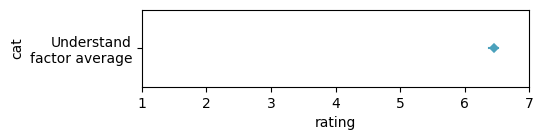

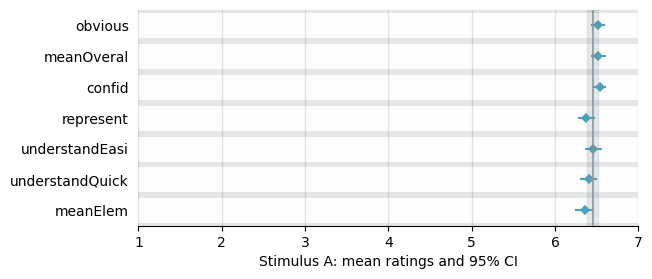

CI width= 0.2239800347222216
Line2D(_child0)
Found CI bar


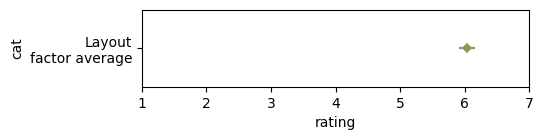

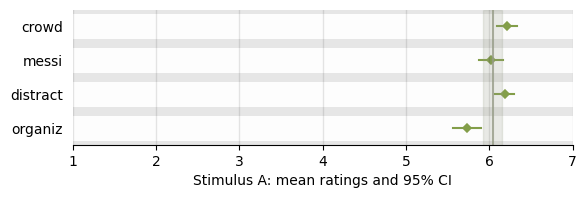

CI width= 0.2972902097902086
Line2D(_child0)
Found CI bar


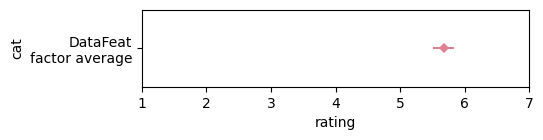

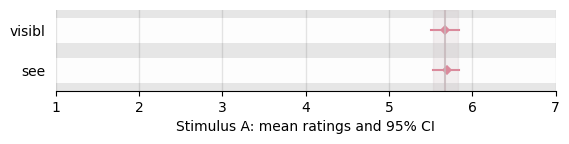

CI width= 0.18001880787037106
Line2D(_child0)
Found CI bar


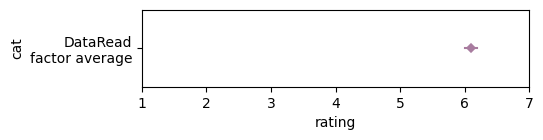

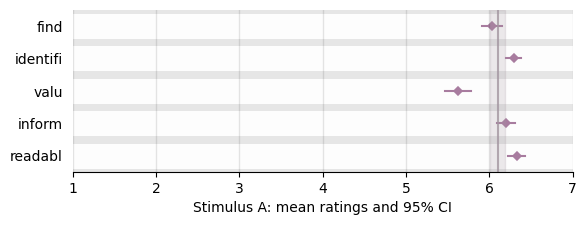

CI width= 0.13642113095238084
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


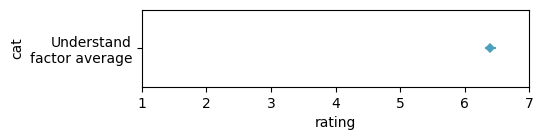

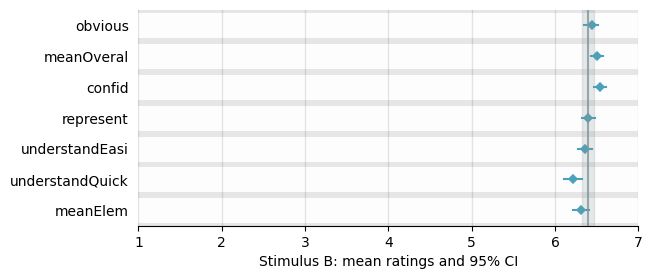

CI width= 0.284302662037037
Line2D(_child0)
Found CI bar


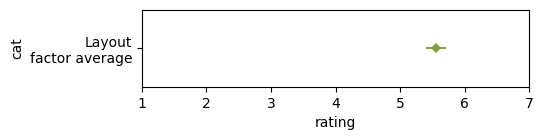

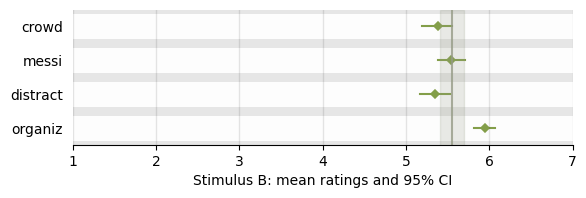

CI width= 0.2421602787456445
Line2D(_child0)
Found CI bar


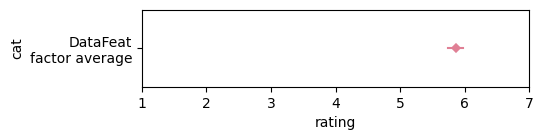

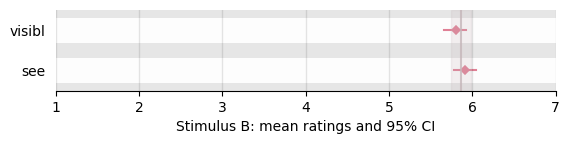

CI width= 0.16582031250000018
Line2D(_child0)
Found CI bar


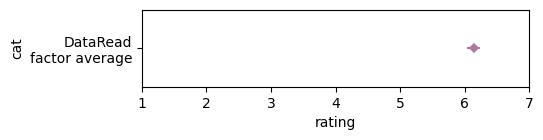

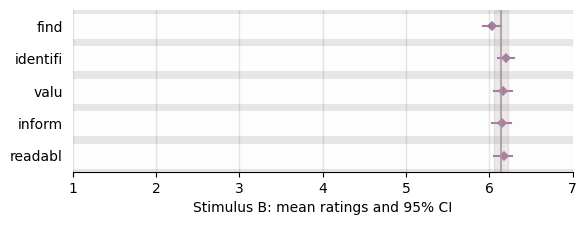

CI width= 0.15300937448150087
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


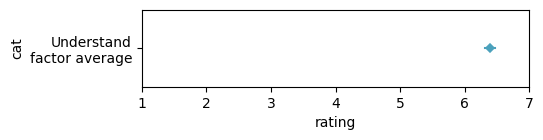

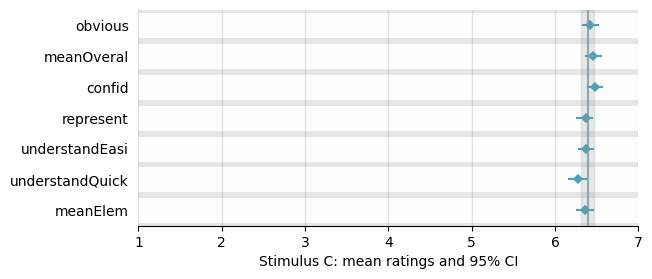

CI width= 0.2555458768873402
Line2D(_child0)
Found CI bar


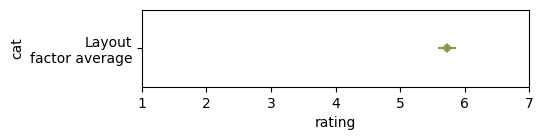

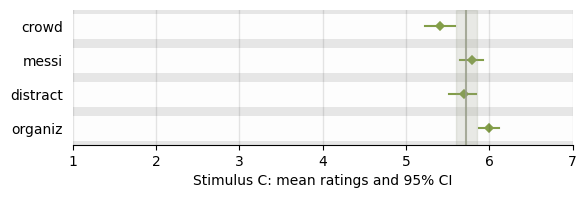

CI width= 0.30152439024390176
Line2D(_child0)
Found CI bar


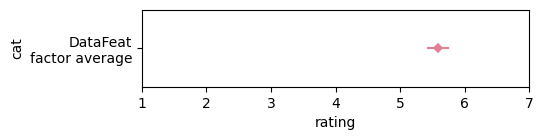

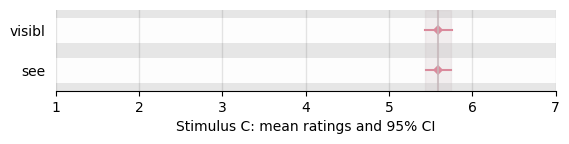

CI width= 0.17077526132404142
Line2D(_child0)
Found CI bar


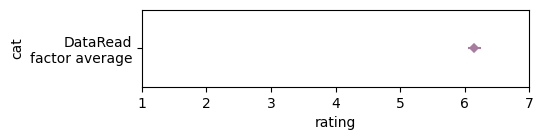

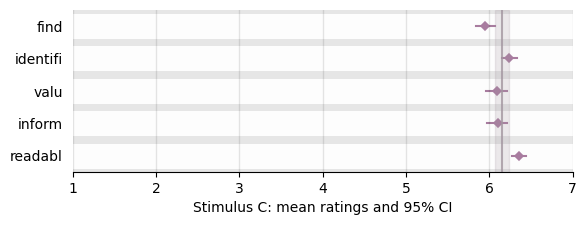

CI width= 0.31096008629989136
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


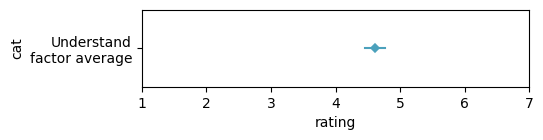

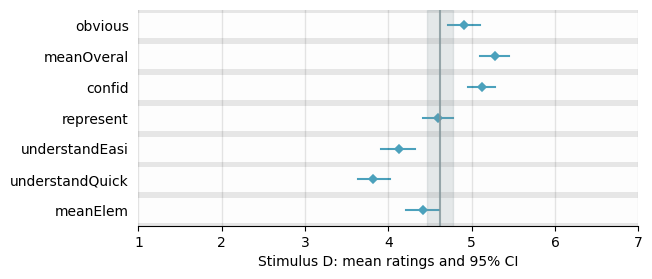

CI width= 0.2878843042071195
Line2D(_child0)
Found CI bar


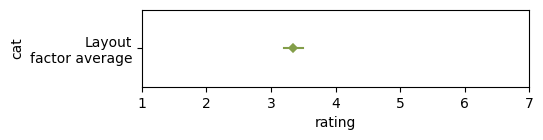

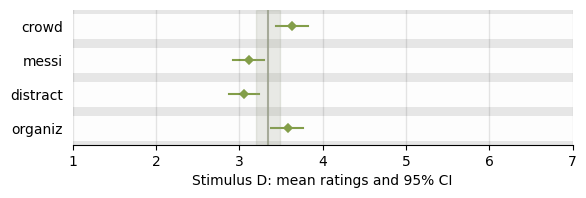

CI width= 0.3604301948051951
Line2D(_child0)
Found CI bar


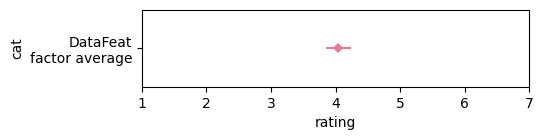

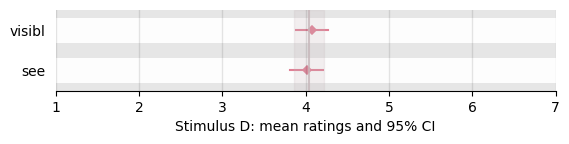

CI width= 0.30852346278317233
Line2D(_child0)
Found CI bar


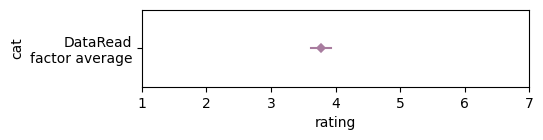

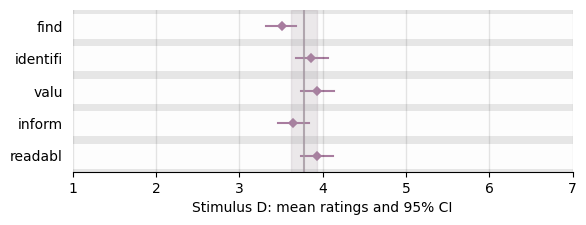

CI width= 0.32599138631561875
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


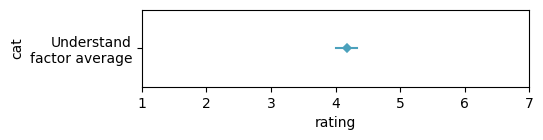

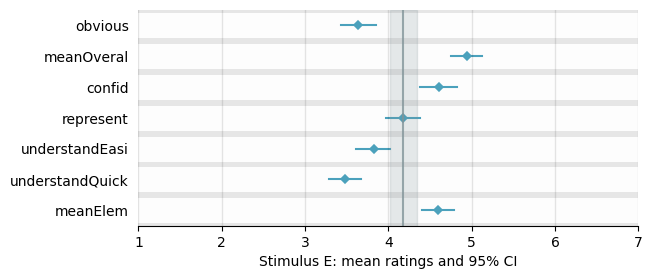

CI width= 0.31117747440273025
Line2D(_child0)
Found CI bar


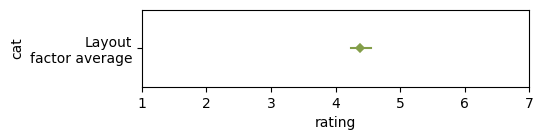

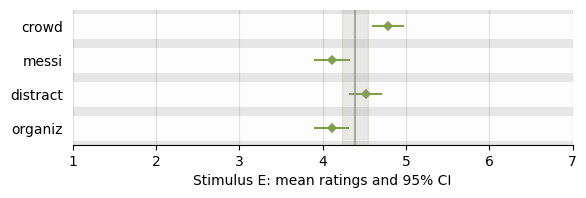

CI width= 0.36095950704225377
Line2D(_child0)
Found CI bar


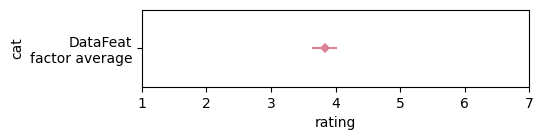

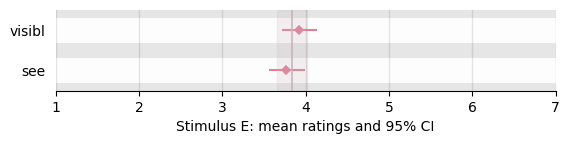

CI width= 0.29683020477815614
Line2D(_child0)
Found CI bar


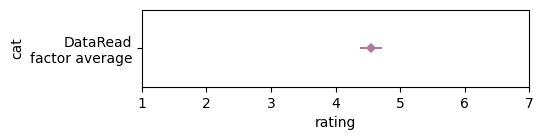

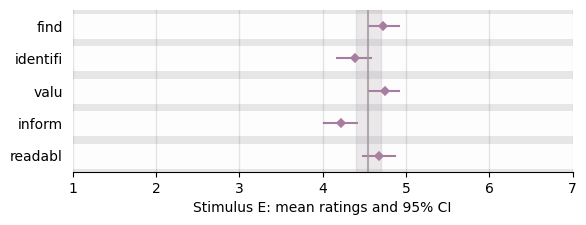

CI width= 0.2609032179424675
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


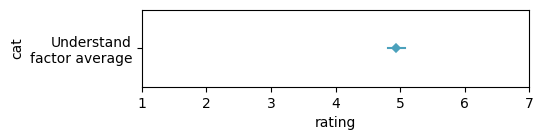

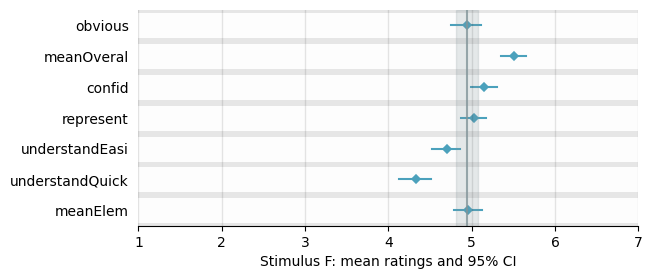

CI width= 0.27969283276450474
Line2D(_child0)
Found CI bar


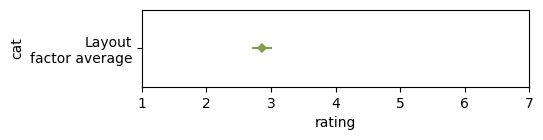

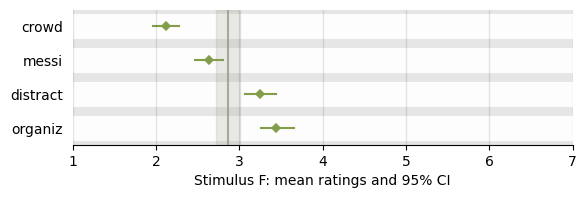

CI width= 0.32768771331057955
Line2D(_child0)
Found CI bar


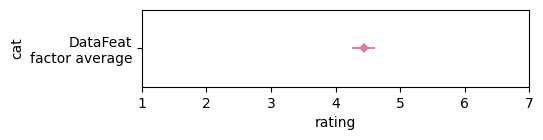

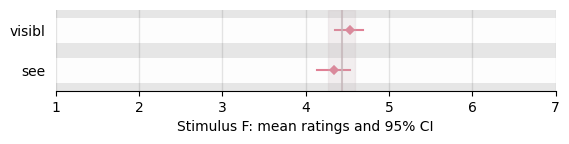

CI width= 0.2765358361774739
Line2D(_child0)
Found CI bar


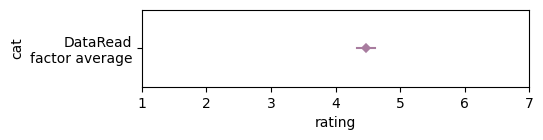

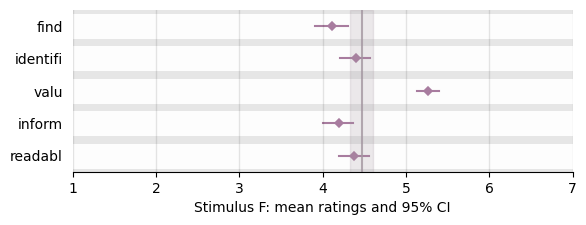

CI width= 0.1458333333333348
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


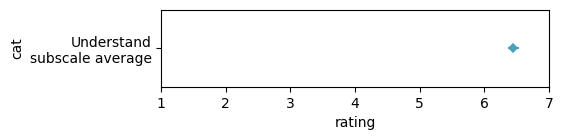

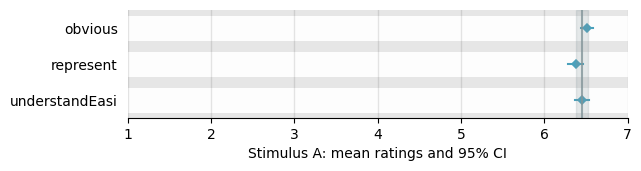

CI width= 0.20497685185185155
Line2D(_child0)
Found CI bar


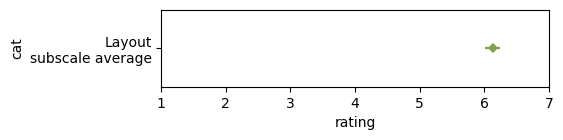

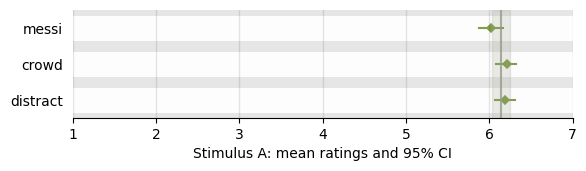

CI width= 0.3024912587412585
Line2D(_child0)
Found CI bar


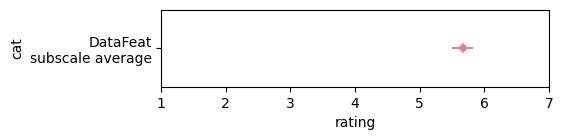

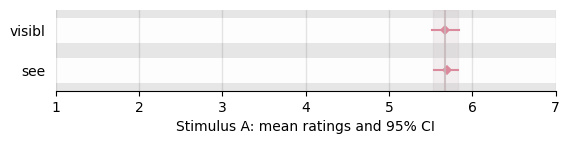

CI width= 0.18809317129629743
Line2D(_child0)
Found CI bar


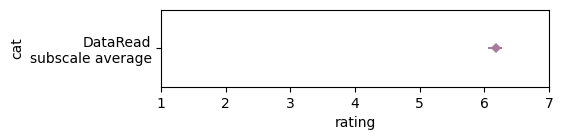

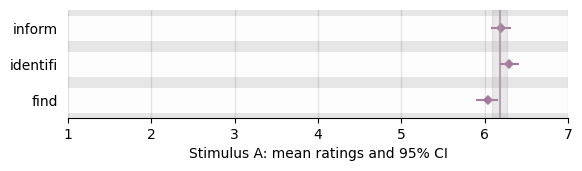

CI width= 0.1540219907407412
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


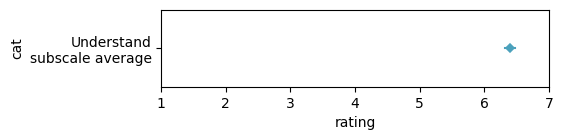

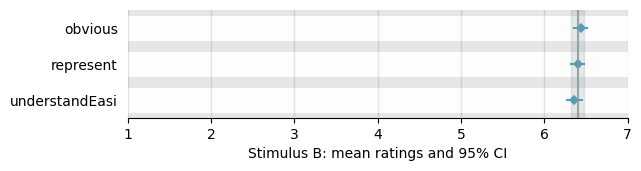

CI width= 0.33687789351851816
Line2D(_child0)
Found CI bar


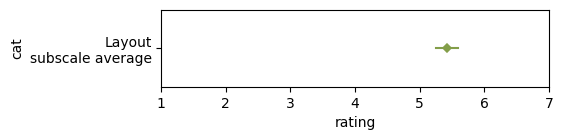

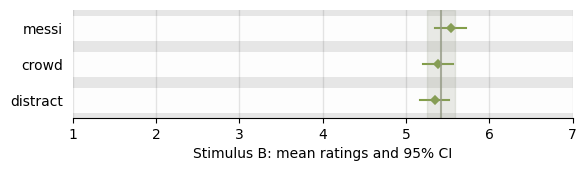

CI width= 0.2352351916376314
Line2D(_child0)
Found CI bar


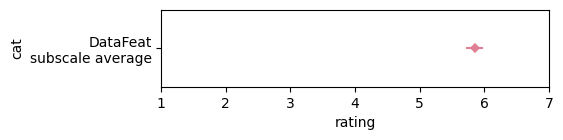

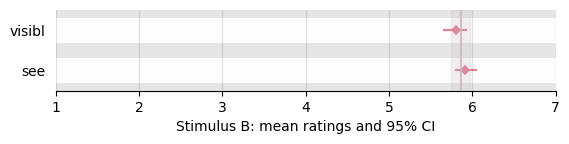

CI width= 0.1771122685185178
Line2D(_child0)
Found CI bar


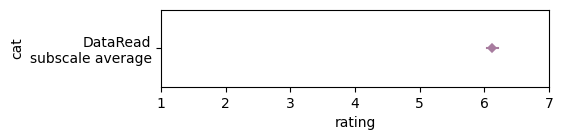

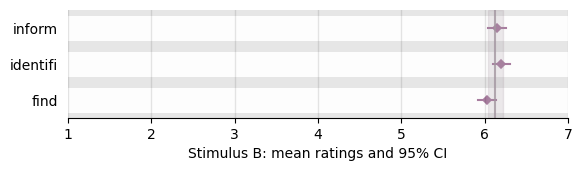

CI width= 0.16090301974448362
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


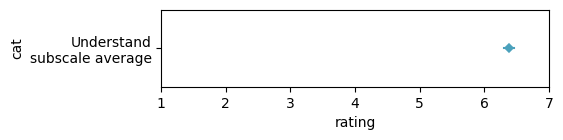

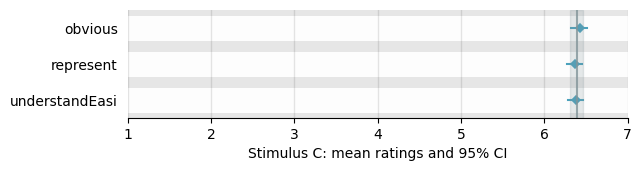

CI width= 0.284668989547038
Line2D(_child0)
Found CI bar


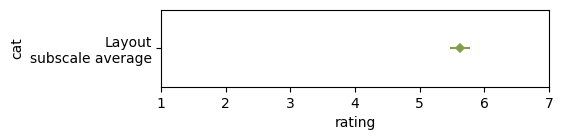

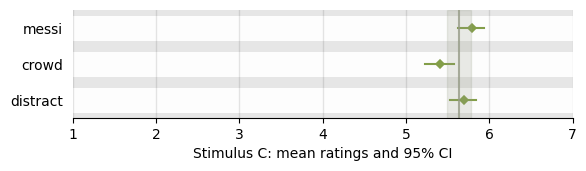

CI width= 0.29272648083623665
Line2D(_child0)
Found CI bar


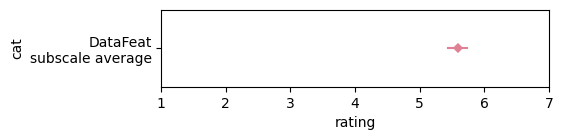

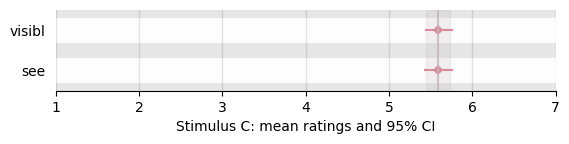

CI width= 0.18821138211382138
Line2D(_child0)
Found CI bar


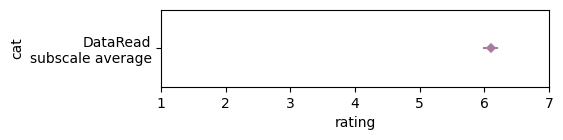

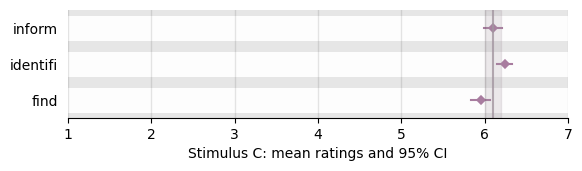

CI width= 0.3350593311758363
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


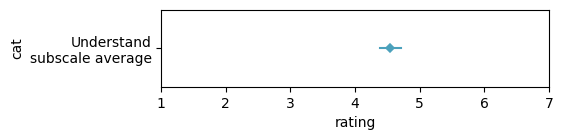

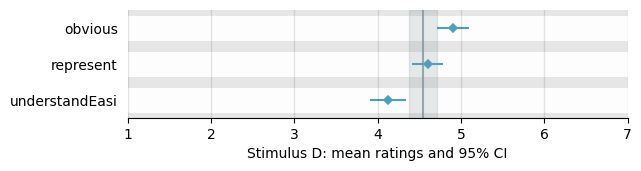

CI width= 0.3037216828478968
Line2D(_child0)
Found CI bar


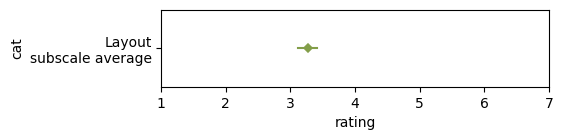

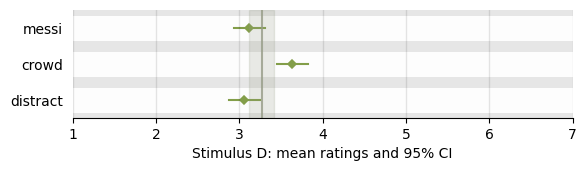

CI width= 0.38802759740259773
Line2D(_child0)
Found CI bar


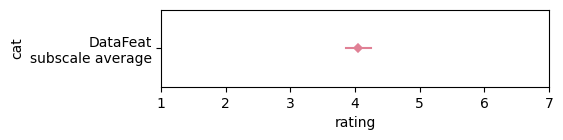

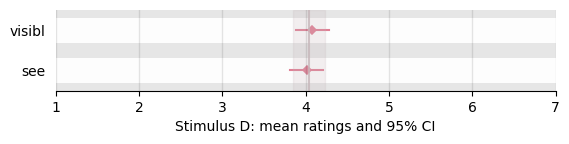

CI width= 0.32694174757281536
Line2D(_child0)
Found CI bar


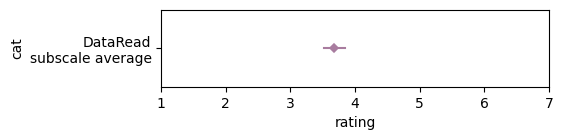

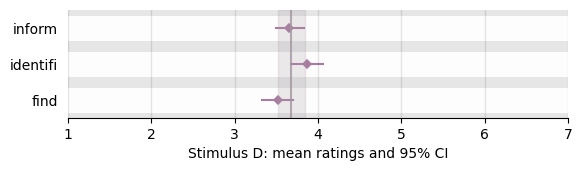

CI width= 0.36088755707762576
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


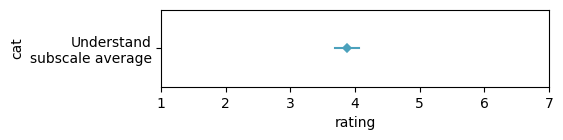

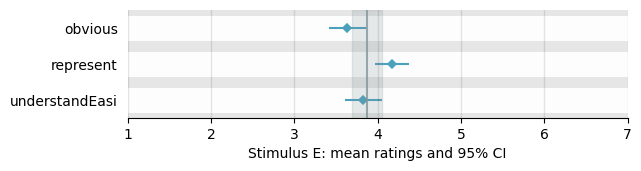

CI width= 0.3323094425483495
Line2D(_child0)
Found CI bar


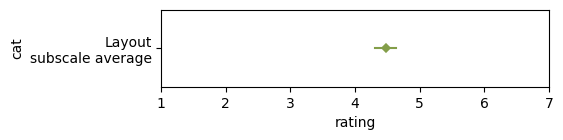

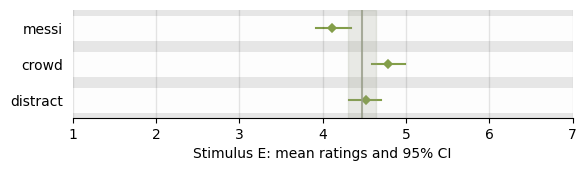

CI width= 0.3628521126760562
Line2D(_child0)
Found CI bar


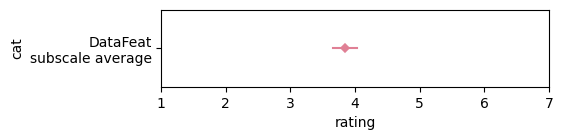

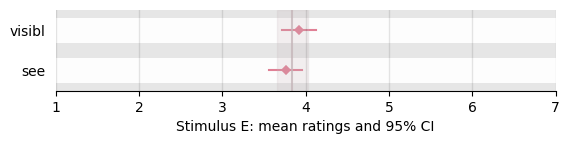

CI width= 0.3442974971558588
Line2D(_child0)
Found CI bar


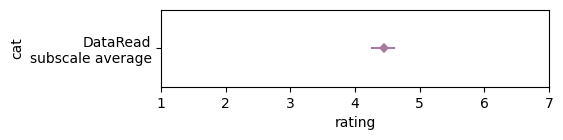

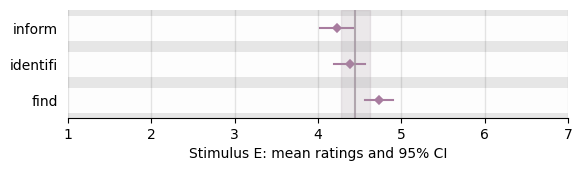

CI width= 0.29529294653014837
Line2D(_child0)
Found CI bar


C:\Users\Anne-Flore\AppData\Local\Temp\ipykernel_25300\2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


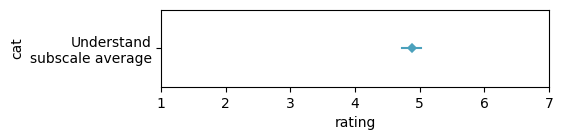

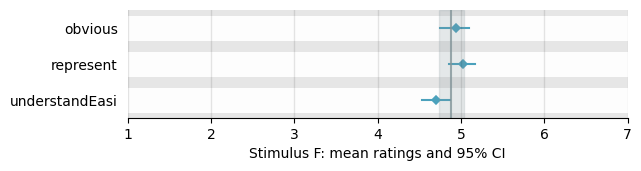

CI width= 0.28671786120591536
Line2D(_child0)
Found CI bar


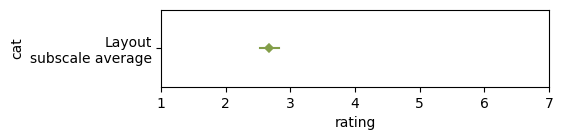

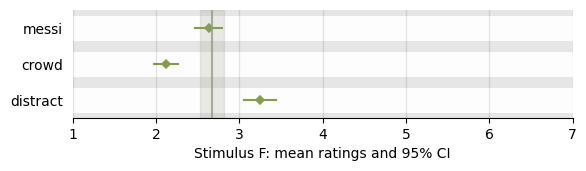

CI width= 0.33122866894197855
Line2D(_child0)
Found CI bar


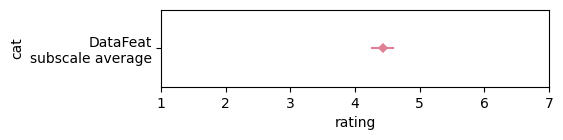

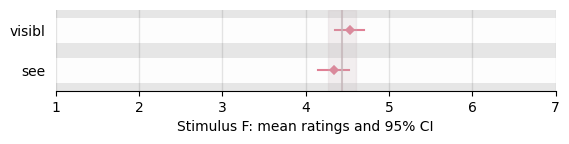

CI width= 0.3493174061433457
Line2D(_child0)
Found CI bar


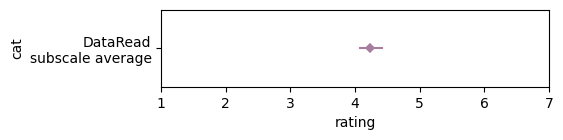

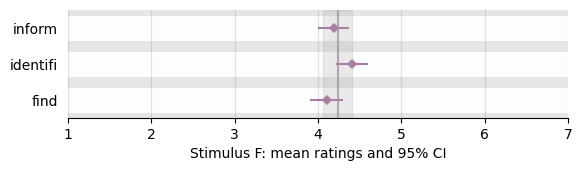

In [5]:
# per stimulus, all factor items
def make_plots_per_stimulusXfactor_across_items(d, condition_list, factor_dict, fileprefix='', colors_dict='hls'):
    
    if 'PREVis' in fileprefix:
        legend_average_name = 'subscale'
        folder = f'{plots_outdir}-PREVis'
    elif 'factors' in fileprefix:
        legend_average_name = 'factor'
        folder = f'{plots_outdir}-factors'
    
    for c in condition_list:
        this_c_df = d[d['stimulus'] == c]
        this_c_df.drop(columns=['stimulus'], inplace=True)
        for f in factor_dict:
            this_f_average_cat_name = f'{f}\n{legend_average_name} average'

            this_c_f_df = this_c_df[factor_dict[f]]+4
            this_c_f_df[this_f_average_cat_name] = this_c_f_df.mean(axis=1)

            if isinstance(colors_dict, dict):
                sns.set_palette(colors_dict[f]) 
            elif isinstance(colors_dict, list):
                sns.set_palette(colors_dict)

            df_to_plot = pd.DataFrame()
            for col in this_c_f_df.columns:
                this_col_df = pd.DataFrame(this_c_f_df[col])
                this_col_df.rename(columns={col:'rating'}, inplace=True)
                this_col_df['cat'] = col
                df_to_plot = pd.concat([df_to_plot, this_col_df], axis=0, ignore_index=True)

            sns.set_palette(colors[f]) 

            fig2 = plt.figure(figsize=(5,1))

            ax2 = sns.pointplot(
                data=df_to_plot[df_to_plot['cat']==this_f_average_cat_name], x='rating', y="cat", 
                errorbar="ci", capsize=0,
                linestyle="none", linewidth=1.5,
                marker="D", markersize=4,
            )
            ax2.set_xlim(left=1, right=7)

            #first line object is the point
            point_line = ax2.lines[0]
            x, y = point_line.get_xydata().T
            rating_point = x

            CI_line = ax2.lines[1]
            ci_coord = CI_line.__dict__['_xorig']
            ci_width = ci_coord[1]-ci_coord[0]
            print("CI width=", ci_width)


            for line in ax2.lines:
                  # Get the x and y coordinates of the line
                print(line)
                if isinstance(line, mpl.lines.Line2D) and '_xorig' in line.__dict__:
                    print('Found CI bar')
                    # Extract the error bar data
                    rating_point = np.mean(x)  # Get the x value (rating point)
                    break

            plt.show(fig2)


            # get number of items to plot to calculate height of figure
            nb_items = len(df_to_plot['cat'].unique())
            fig = plt.figure()

            ax1 = sns.pointplot(
                data=df_to_plot[df_to_plot['cat']!=this_f_average_cat_name], x='rating', y="cat", 
                errorbar="ci", capsize=0,
                linestyle="none", linewidth=1.5,
                marker="D", markersize=4,
            )

            #background grey color
            ax1.set_facecolor((0.9,0.9,0.9))

            #plot average and CI rectangle
            ax1.axvline(x=rating_point, color=colors[f][1], alpha = 0.8, zorder=2)
            # Calculate the left and right boundaries of the rectangle
            left = rating_point - ci_width / 2
            right = rating_point + ci_width / 2

            # Plot the rectangle
            ax1.add_patch(plt.Rectangle((left, -0.5), ci_width, len(df_to_plot['cat'].unique()), color=colors[f][1], alpha=0.2, zorder=2))

            # x axis parameters
            ax1.set_xlim(left=1, right=7)
            ax1.set_xlabel(f'Stimulus {c}: mean ratings and 95% CI')

            # Manually plot vertical lines following x-axis ticks
            for x_tick in ax1.get_xticks()[0:]: #ignoring the first tick
                ax1.axvline(x_tick, color=((0,0,0,0.1)), linewidth=1, zorder=5)

            # y axis parameters
            ax1.tick_params(axis='y', width=0) # remove ticks
            # ax1.grid(axis='y', linewidth=12+fig_height, color='white', alpha=0.95, zorder=0)
            ax1.grid(axis='y', linewidth=18, color='white', alpha=0.95, zorder=0)
            ax1.set_ylabel('')
            
            sns.despine(left=True, top=True, right=True) #removing the frame

            def set_size(w,h, ax=None): #https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units
                """ w, h: width, height in inches """
                if not ax: ax=plt.gca()
                l = ax.figure.subplotpars.left
                r = ax.figure.subplotpars.right
                t = ax.figure.subplotpars.top
                b = ax.figure.subplotpars.bottom
                figw = float(w)/(r-l)
                figh = float(h)/(t-b)
                ax.figure.set_size_inches(figw, figh)

            set_size(5,nb_items/3.7)

            plt.show(fig)

            # plt.show(g)
            fig.savefig(f"{folder}/{c}-{fileprefix}_{f}.pdf", bbox_inches='tight')


make_plots_per_stimulusXfactor_across_items(df, conditions, full_factors, fileprefix='Full_factors_ratings', colors_dict=colors)
make_plots_per_stimulusXfactor_across_items(df, conditions, final_scale, fileprefix='PREVis_items_ratings', colors_dict=colors)

## Plot each item across stimuli

obvious


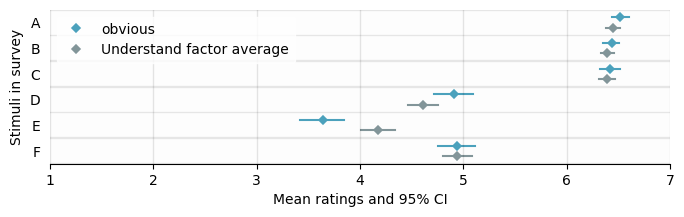

meanOveral


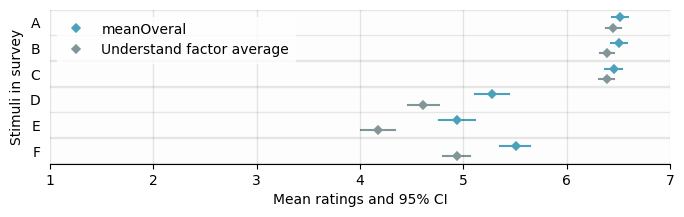

confid


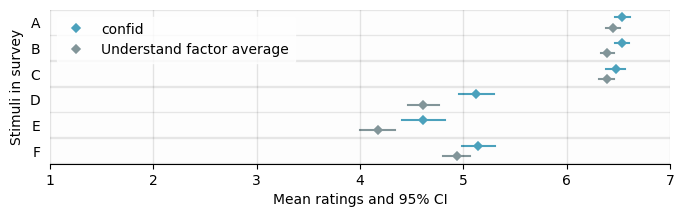

represent


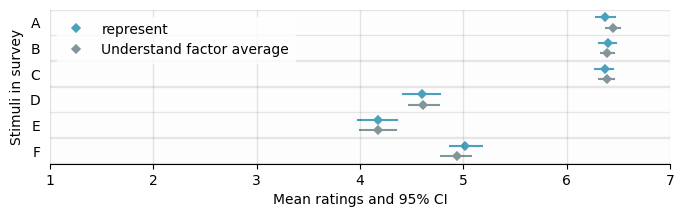

understandEasi


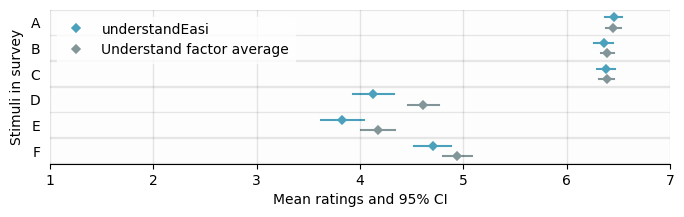

understandQuick


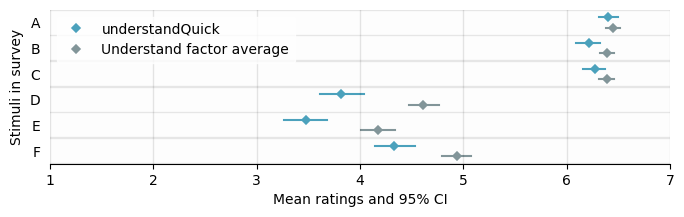

meanElem


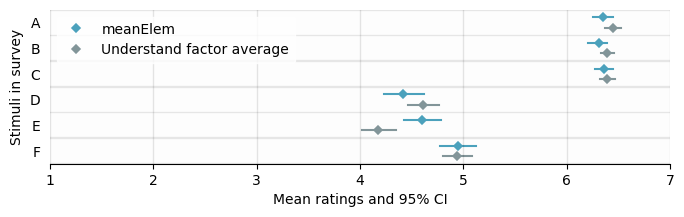

crowd


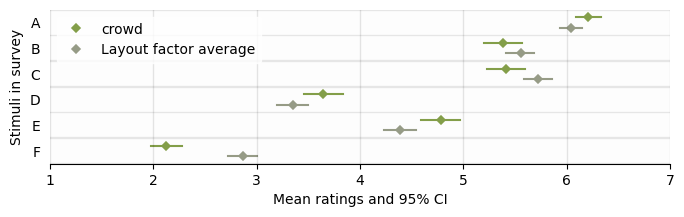

messi


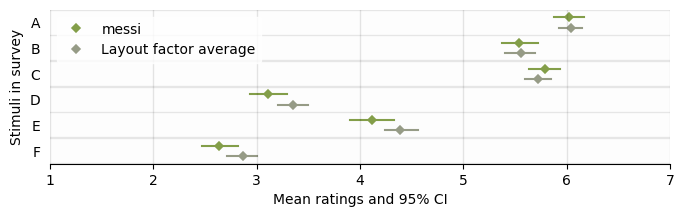

distract


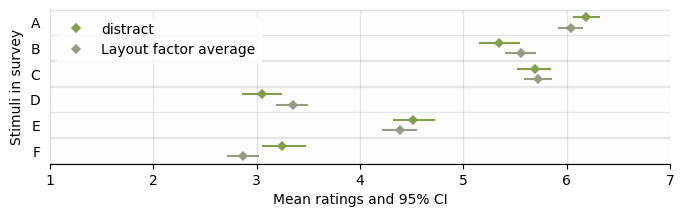

organiz


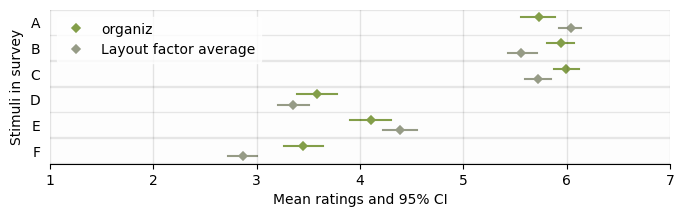

visibl


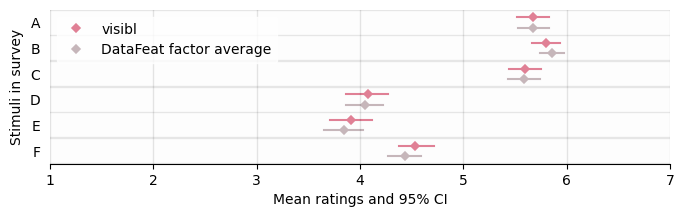

see


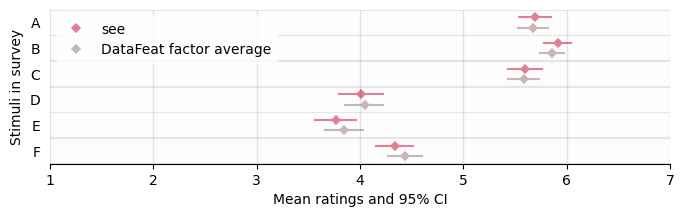

find


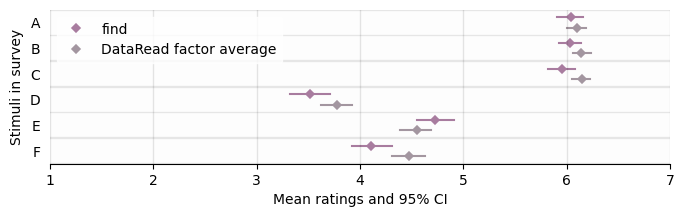

identifi


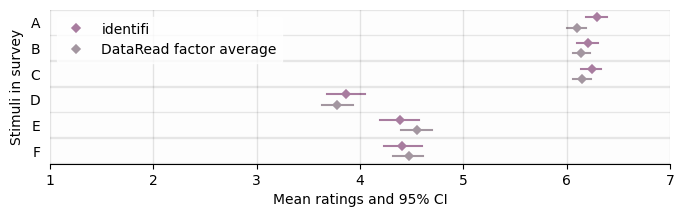

valu


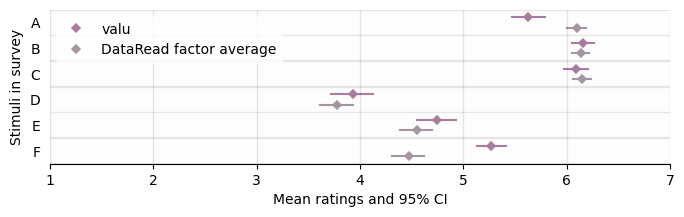

inform


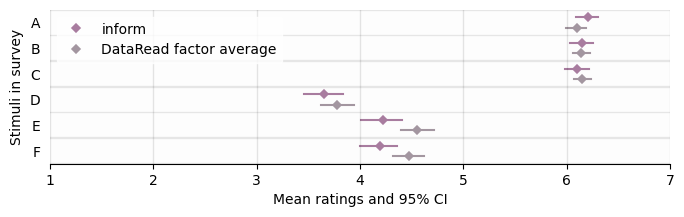

readabl


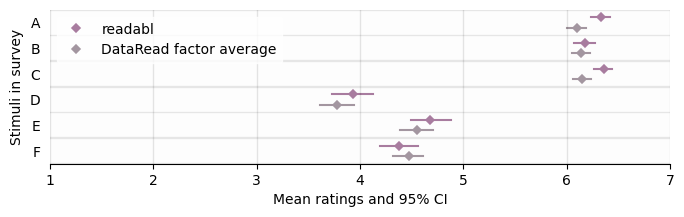

obvious


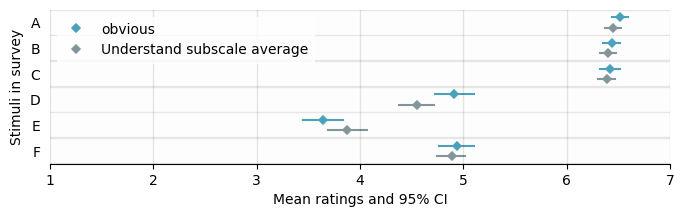

represent


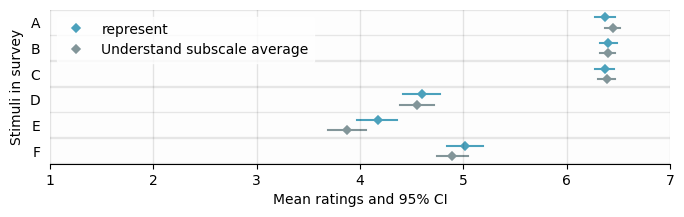

understandEasi


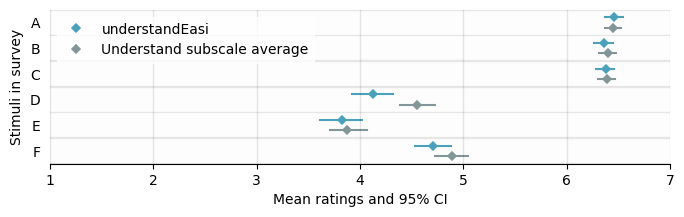

messi


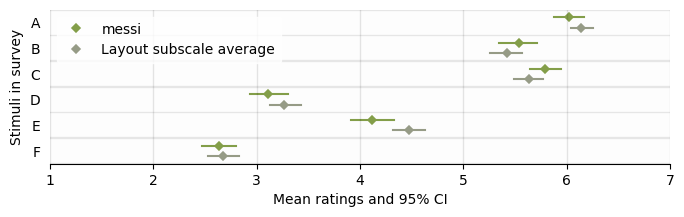

crowd


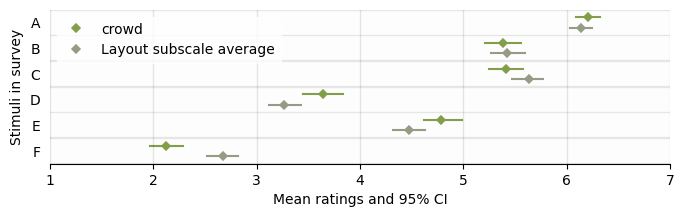

distract


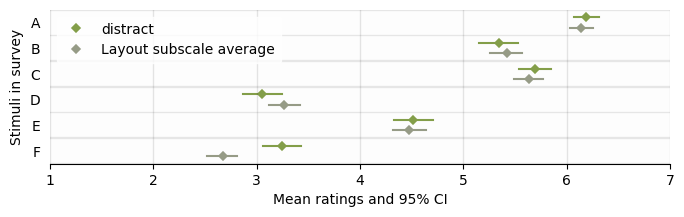

visibl


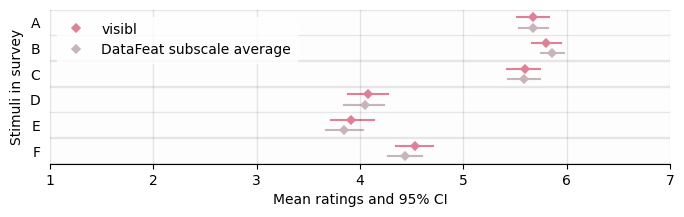

see


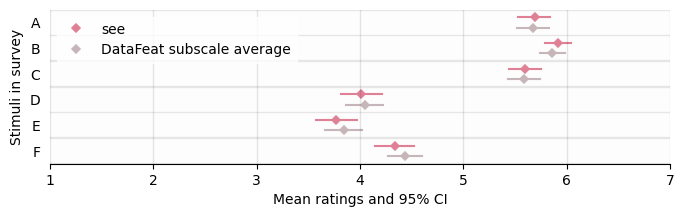

inform


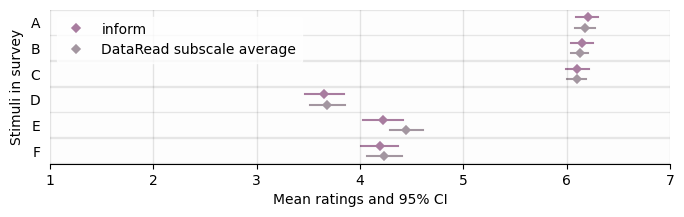

identifi


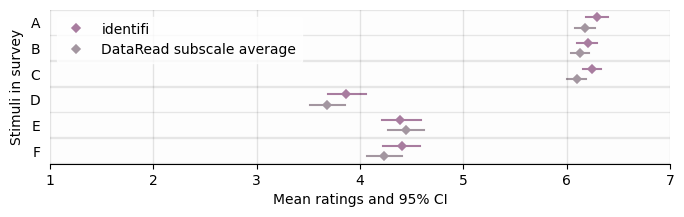

find


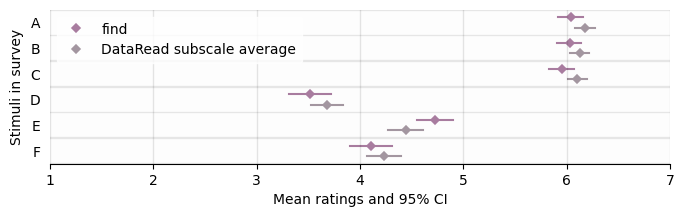

In [7]:
#plot each item across multiple stimuli

def make_plots_per_itemXfactor_across_stimuli(d, factor_dict, fileprefix):
    if 'PREVis' in fileprefix:
        legend_average_name = 'subscale'
        folder = f'{plots_outdir}-PREVis'
    elif 'factors' in fileprefix:
        legend_average_name = 'factor'
        folder = f'{plots_outdir}-factors'

    for f in factor_dict:
        this_f_df = d[['stimulus']+factor_dict[f]]
        this_f_average = pd.DataFrame(this_f_df['stimulus'])
        this_f_average['rating'] = this_f_df[factor_dict[f]].mean(axis=1)+4
        this_f_average['type'] = f'{f} {legend_average_name} average'
        sns.set_palette(colors[f]) 
        for i in factor_dict[f]:
            print(i)
            this_i_df = pd.DataFrame(this_f_df['stimulus'])
            this_i_df['rating'] = this_f_df[[i]]+4
            this_i_df['type'] = i
            plot_i_df = pd.concat([this_i_df,this_f_average], axis=0, ignore_index=True)
            
            fig = plt.figure(figsize=(8,2))

            ax1 = sns.pointplot(
                data=plot_i_df,
                x='rating',
                y="stimulus",
                hue='type', dodge=0.4,
                errorbar="ci", capsize=0,
                #palette="Accent_r", #color=".5",
                linestyle="none", linewidth=1.5,
                marker="D", markersize=4,
            )
            
            #background grey color
            ax1.set_facecolor((0.9,0.9,0.9))

            # x axis parameters
            ax1.set_xlim(left=1, right=7)
            ax1.set_xlabel('Mean ratings and 95% CI')

            # Manually plot vertical lines following x-axis ticks
            for x_tick in ax1.get_xticks()[0:]: #ignoring the first tick
                ax1.axvline(x_tick, color=((0,0,0,0.1)), linewidth=1, zorder=5)

            # y axis parameters
            ax1.tick_params(axis='y', width=0) # remove ticks
            ax1.grid(axis='y', linewidth=17, color='white', alpha=0.95, zorder=0)
            ax1.set_ylabel('Stimuli in survey')
            
            ax1.legend(title='', loc='upper left', edgecolor='white')

            # sns.move_legend(ax1, "lower right", bbox_to_anchor=(1, 1))
            sns.despine(left=True, top=True, right=True) #removing the frame

            plt.show(fig)
            fig.savefig(f"{folder}/{fileprefix}-{f}_{i}.pdf", bbox_inches='tight')

make_plots_per_itemXfactor_across_stimuli(df, full_factors, 'Full_factors_ratings')
make_plots_per_itemXfactor_across_stimuli(df, final_scale, 'PREVis_items_ratings')

# Plot averages only

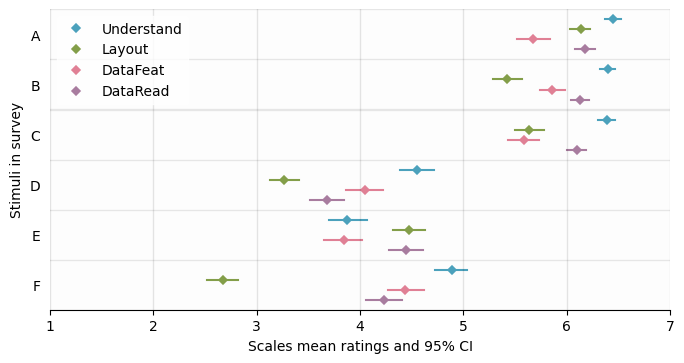

In [8]:
#plot each item across multiple stimuli

def make_plots_per_scale_across_stimuli(d, factor_dict, fileprefix):
    if 'PREVis' in fileprefix:
        legend_average_name = 'subscale'
        folder = f'{plots_outdir}-PREVis'
    elif 'factors' in fileprefix:
        legend_average_name = 'factor'
        folder = f'{plots_outdir}-factors'

    scales_colors = []

    df_to_plot = pd.DataFrame()

    for f in factor_dict:
        this_f_cols = factor_dict[f]
        this_f_d = pd.DataFrame(df[this_f_cols].mean(axis=1)+4, columns=['ratings'])
        this_f_d['subscale'] = f
        this_f_d['stimulus'] = d['stimulus']

        df_to_plot = pd.concat([df_to_plot, this_f_d], axis=0, ignore_index=True)

        scales_colors += [colors[f][0]]

        
    sns.set_palette(scales_colors)     
    fig = plt.figure(figsize=(8,3.9))

    ax1 = sns.pointplot(
        data=df_to_plot,
        x='ratings',
        y="stimulus",
        hue='subscale', dodge=0.6,
        errorbar="ci", capsize=0,
        linestyle="none", linewidth=1.5,
        marker="D", markersize=4,
    )
    
    #background grey color
    ax1.set_facecolor((0.9,0.9,0.9))

    # x axis parameters
    ax1.set_xlim(left=1, right=7)
    ax1.set_xlabel('Scales mean ratings and 95% CI')

    # Manually plot vertical lines following x-axis ticks
    for x_tick in ax1.get_xticks()[0:]: #ignoring the first tick
        ax1.axvline(x_tick, color=((0,0,0,0.1)), linewidth=1, zorder=5)

    # y axis parameters
    ax1.tick_params(axis='y', width=0) # remove ticks
    ax1.grid(axis='y', linewidth=35, color='white', alpha=0.95, zorder=0)
    ax1.set_ylabel('Stimuli in survey')
    
    ax1.legend(title='', loc='upper left', edgecolor='white')

    # sns.move_legend(ax1, "lower right", bbox_to_anchor=(1, 1))
    sns.despine(left=True, top=True, right=True) #removing the frame

    plt.show(fig)
    fig.savefig(f"{folder}/{fileprefix}.pdf", bbox_inches='tight')

# make_plots_per_itemXfactor_across_stimuli(df, full_factors, 'Full_factors_ratings')
make_plots_per_scale_across_stimuli(df, final_scale, 'PREVis_subscales_ratings')